In [36]:
import json
import os

# mailong dataset
MAILONG_DATA_DIR = '/home/uyen/workspace/nlp_project/repos/bert-vietnamese-question-answering/dataset'
mailong_train_data = json.load(open(os.path.join(MAILONG_DATA_DIR, 'train_IR.json')))
print('TRAIN', len(mailong_train_data))

label_true = 0
for item in mailong_train_data:
    if item['label']:
        label_true+=1
label_false = len(mailong_train_data) - label_true

print('- label true', label_true)
print('- label false', label_false)

mailong_test_data = json.load(open(os.path.join(MAILONG_DATA_DIR, 'test_IR.json')))
print('TEST', len(mailong_test_data))

TRAIN 18108
- label true 5738
- label false 12370
TEST 501


In [133]:
5738+3498+4989

14225

In [128]:
mailong_test_data[-102]

{'__id__': 'test_0400',
 'question': 'Việt Nam là nước xuất khẩu gạo đứng thứ mấy thế giới',
 'title': 'Lịch sử Việt Nam',
 'paragraphs': [{'id': 'p1',
   'text': 'Công cuộc đổi mới được phát hành toàn diện , từ một nước nhập khẩu và nhận viện trợ của nước ngoài thành nước xuất khẩu . Trước 1989 , Việt Nam nhập khẩu lương thực nhưng từ năm 1989 , Việt Nam bắt đầu xuất khẩu 1-1,5 triệu tấn gạo mỗi năm ; và tăng dần hàng năm : 4,5 triệu tấn ( năm 2004 ) , 4,9 triệu tấn ( năm 2005 ) , đứng thứ 2 thế giới về xuất khẩu gạo .'},
  {'id': 'p2',
   'text': 'Trước 1989 , Việt Nam nhập khẩu lương thực nhưng từ năm 1989 , Việt Nam bắt đầu xuất khẩu 1-1,5 triệu tấn gạo mỗi năm ; và tăng dần hàng năm : 4,5 triệu tấn ( năm 2004 ) , 4,9 triệu tấn ( năm 2005 ) , đứng thứ 2 thế giới về xuất khẩu gạo . Lạm phát giảm dần ( đến năm 1990 còn 67,4% ) và năm 2005 lạm phát chỉ còn 8,5% .'},
  {'id': 'p3',
   'text': 'Ngày 11 tháng 1 năm 2007 , Việt Nam chính thức trở thành thành viên thứ 150 của Tổ chức Thươn

In [ ]:
from collections import defaultdict
import json
import os
# zac22
ZAC_DATA_DIR = '/home/uyen/workspace/nlp_project/data/e2e_qa/e2eqa-train+public_test-v1'
zac_data = json.load(open(os.path.join(ZAC_DATA_DIR, 'zac2022_train_merged_final.json')))
print('TRAIN', len(zac_data['data']))

categories = defaultdict(lambda: 0)
for item in zac_data['data']:
    categories[item['category']] += 1
    # if item['category'] == 'FALSE_LONG_ANSWER':
    #     print(item)
    #     break

for k, v in categories.items():
    print(f'- {k}: {v}')



TRAIN 20857
- PARTIAL_ANNOTATION: 3498
- FULL_ANNOTATION: 4989
- FALSE_LONG_ANSWER: 12370


In [134]:
12370 + 12370

24740

In [123]:
import jsonlines
from tqdm import tqdm
length_counter = defaultdict(lambda: 0)
for item in mailong_test_data:
    words = item['question'].split()
    length_counter[len(words)]+=1
# with jsonlines.open('/home/uyen/workspace/nlp_project/data/e2e_qa/wikipedia_20220620_cleaned.jsonl') as reader:
#     for item in tqdm(reader, total=1273468):
#         words = item['text'].split()
#         length_counter[len(words)]+=1

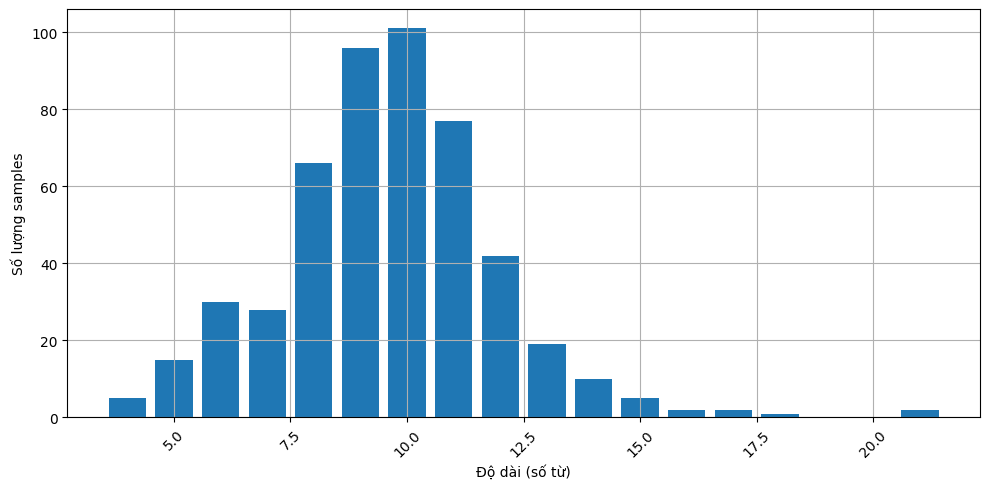

In [124]:
import matplotlib.pyplot as plt
from collections import Counter

# Chuyển sang dạng dict chuẩn
length_counter = dict(length_counter)

top_lengths = Counter(length_counter).most_common(len(length_counter))
top_lenght = [k for k, v in top_lengths]
top_sample = [v for k, v in top_lengths]

plt.figure(figsize=(10, 5))
plt.bar(top_lenght,top_sample)

plt.xlabel("Độ dài (số từ)")
plt.ylabel("Số lượng samples")

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [132]:

x = [k*v for k, v in length_counter.items()]
# max(x)
# min(x)
sum(x)/len(mailong_test_data)

9.604790419161677